# Music Genre Classification

Music genres classification is significant topic to investigate as the genres are one of the few and most valuable tools we have for comprehending and analyzing the works of artists. These classifications have the capacity to significantly improve our knowledge, recognition, and pleasure of the music we hear when utilized flexibly and descriptively. Music categorization makes it easier for us to find music that suits our tastes, as well as for artists to sell their music in a way that distinguishes them from the competition.

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

## Loading the data:

The dataset was acquired from one of the MachineHack Hackathon [see resource](https://www.kaggle.com/purumalgi/music-genre-classification). It consists of a training dataset of 17,996 rows with 17 columns. 

In [87]:
data = pd.read_csv("data/train.csv")

In [88]:
data.head(30)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


In [89]:
data.shape

(17996, 17)

## Features investigating:

In [90]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

There are 17 columns in this dataset, which can be explianed as follows:
- **Artist Name**: indicates the name of the artist 
- **Track Name**: the name of the song or piece 
- **Popularity**: is a measure of how the song is wide appeal that is typically distributed to large audiences 
- **danceability**: it describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy**: represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
- **key**: is the main group of pitches, or notes, that form the harmonic foundation of a piece of music
- **loudness**: it is an attribute of a sound that determines the magnitude of the auditory sensation produced 
- **mode**: a mode is the vocabulary of a melody, it specifies which notes can be used and indicates which have special importance. Of these, there are two principal notes: the final, on which the melody ends, and the dominant, which is the secondary centre.
- **speechiness**: Speechiness detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- **acousticness**: this value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one
- **instrumentalness**: this value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is
- **liveness**: this value describes the probability that the song was recorded with a live audience. According to the official documentation a value above 0.8 provides strong likelihood that the track is live
- **valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo**: means the speed at which a piece of music should be played. As with many other musical terms, Italian words are used to describe different tempos of music. Adagio - a slow tempo (other words for slow are lento and largo) Andante - performed at a walking pace
- **duration_in min/ms**: the duration of the song in minutes or in milliseconds
- **time_signature**: indicates how many counts are in each measure and which type of note will receive one count. The top number of a time signature is commonly 2, 3, 4, or 6. The bottom number of a time signature is either 4 or 8
- **Class**: this is our target feature, that indicates the genre of a music. There are 11 classes which are:
    - 0: Acoustic/Folk 
    - 1: Alt_Music 
    - 2: Blues 
    - 3: Bollywood 
    - 4: Country
    - 5: HipHop
    - 6: Indie Alt
    - 7: Instrumental
    - 8: Metal
    - 9: Pop
    - 10: Rock



## Data cleaning:

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

It seems that there are two features of type object which are: **Artist Name** and **Track Name**.
<br> 
**Artist Name** can be removed from the dataset, as the name of the artist will not give an indication of the music genre. Also, **Track Name** can be removed form the dataset for the same reason

In [92]:
data= data.drop(["Artist Name","Track Name"], axis=1)

In [93]:
data.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Moreover, the **duration_in min/ms** needs to be removed, beacause it gives an indication of the duration of the song with two diffierent metrics (meters and milliseconds) and it cannot be seperable.

In [94]:
data= data.drop('duration_in min/ms', axis=1)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        17568 non-null  float64
 1   danceability      17996 non-null  float64
 2   energy            17996 non-null  float64
 3   key               15982 non-null  float64
 4   loudness          17996 non-null  float64
 5   mode              17996 non-null  int64  
 6   speechiness       17996 non-null  float64
 7   acousticness      17996 non-null  float64
 8   instrumentalness  13619 non-null  float64
 9   liveness          17996 non-null  float64
 10  valence           17996 non-null  float64
 11  tempo             17996 non-null  float64
 12  time_signature    17996 non-null  int64  
 13  Class             17996 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 1.9 MB


In [96]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,5.000000,10.000000


## Dealing with Null values:

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        17568 non-null  float64
 1   danceability      17996 non-null  float64
 2   energy            17996 non-null  float64
 3   key               15982 non-null  float64
 4   loudness          17996 non-null  float64
 5   mode              17996 non-null  int64  
 6   speechiness       17996 non-null  float64
 7   acousticness      17996 non-null  float64
 8   instrumentalness  13619 non-null  float64
 9   liveness          17996 non-null  float64
 10  valence           17996 non-null  float64
 11  tempo             17996 non-null  float64
 12  time_signature    17996 non-null  int64  
 13  Class             17996 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 1.9 MB


In [98]:
data.isnull().sum()

Popularity           428
danceability           0
energy                 0
key                 2014
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness    4377
liveness               0
valence                0
tempo                  0
time_signature         0
Class                  0
dtype: int64

It seems that **Popularity**, **key** and **instrumentalness** are the features with null values.
<br>
we can replace the null value in **Popularity** with the average value in that column. Same goes for **instrumentalness**. But as the **key** is an indication of the main group of pitches we cannot replace its null values with the mean. So, instead we will drop the null values of **key**.


In [99]:
data.Popularity.fillna(data.Popularity.mean(), inplace=True)

In [100]:
data.instrumentalness.fillna(data.instrumentalness.mean(), inplace=True)

In [101]:
data.dropna(subset=['key'], inplace=True)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15982 entries, 0 to 17995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        15982 non-null  float64
 1   danceability      15982 non-null  float64
 2   energy            15982 non-null  float64
 3   key               15982 non-null  float64
 4   loudness          15982 non-null  float64
 5   mode              15982 non-null  int64  
 6   speechiness       15982 non-null  float64
 7   acousticness      15982 non-null  float64
 8   instrumentalness  15982 non-null  float64
 9   liveness          15982 non-null  float64
 10  valence           15982 non-null  float64
 11  tempo             15982 non-null  float64
 12  time_signature    15982 non-null  int64  
 13  Class             15982 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 1.8 MB


In [106]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class
count,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000
mean,44.521710,0.543770,0.665670,5.952447,-7.883184,0.618258,0.081057,0.245077,0.178628,0.195403,0.484868,122.596752,3.925917,6.697722
std,17.147453,0.166341,0.234387,3.196854,4.025947,0.485829,0.084642,0.310250,0.264536,0.157204,0.239968,29.533995,0.358881,3.197176
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,1.000000,0.000000
25%,33.000000,0.432000,0.512000,3.000000,-9.495750,0.000000,0.035000,0.003960,0.000310,0.097500,0.295000,99.492250,4.000000,5.000000
50%,44.000000,0.545000,0.702500,6.000000,-7.003500,1.000000,0.048150,0.077950,0.053300,0.129000,0.480000,120.047500,4.000000,8.000000
75%,56.000000,0.660000,0.863000,9.000000,-5.187000,1.000000,0.085300,0.430000,0.177562,0.258000,0.670000,141.968750,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,5.000000,10.000000


In [107]:
data.shape

(15982, 14)

So, the total data after cleaning contains 15982 rows and 14 columns

## Data Visualization: 

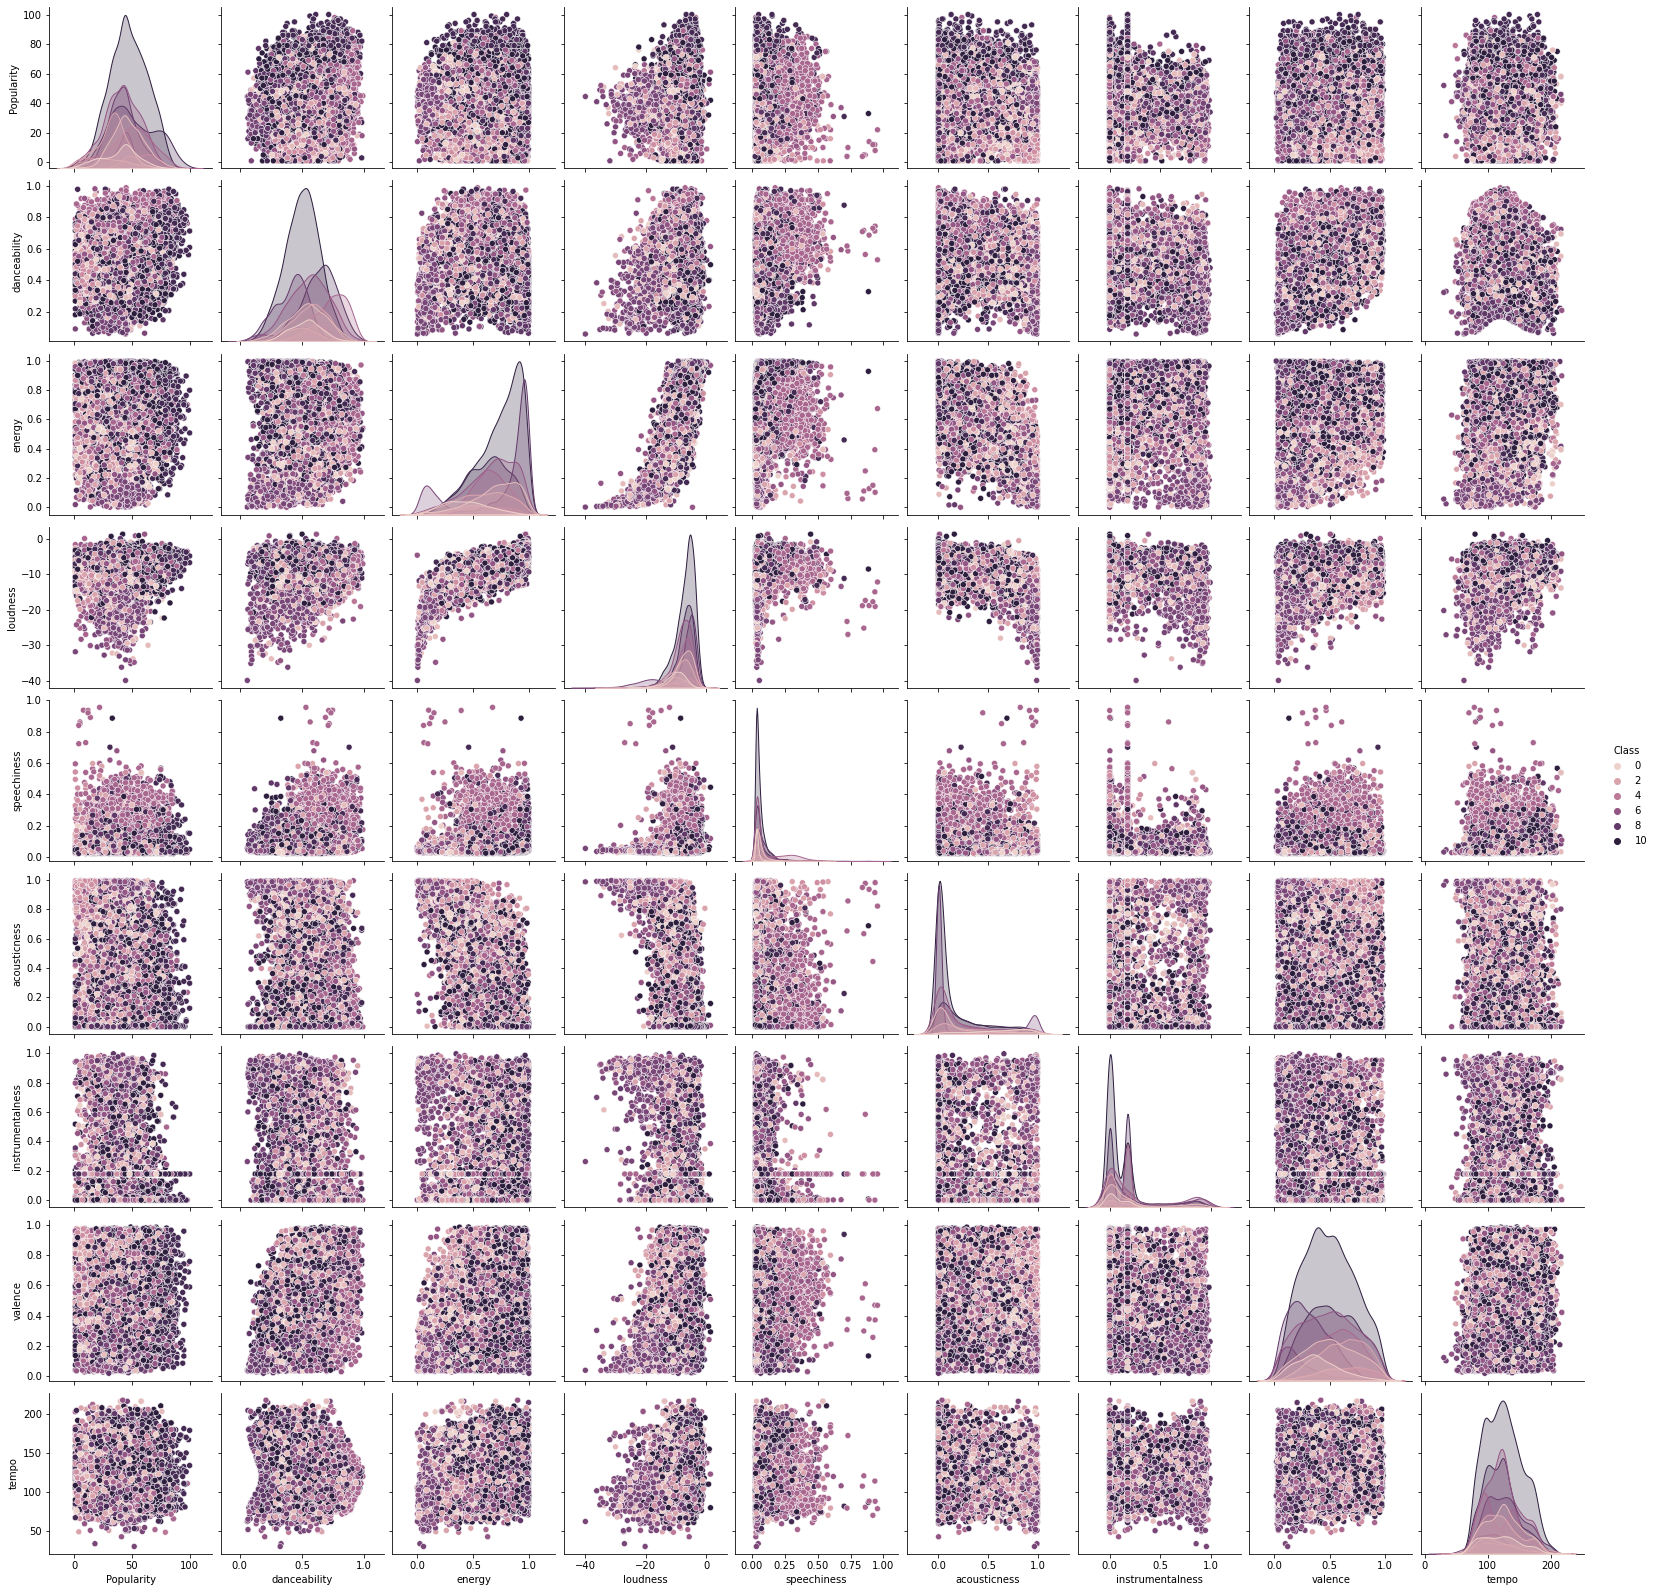

In [122]:
sns.pairplot(data, hue='Class', vars=['Popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo']);

Let's plot the important feature aganist the target variable **Class**, to see how much that feature influncing each class

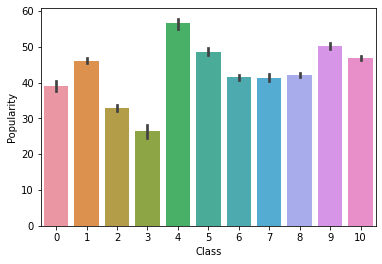

In [108]:
sns.barplot(x = 'Class',y='Popularity',data=data);

It seems that the most popular class is 4: **Country**

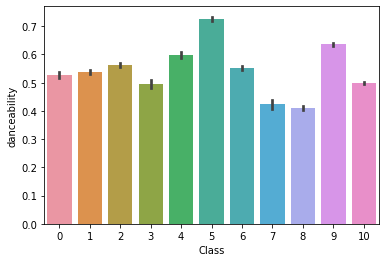

In [110]:
sns.barplot(x = 'Class',y='danceability',data=data);

It seems that the most dancable music is class number 5: **Hiphop**

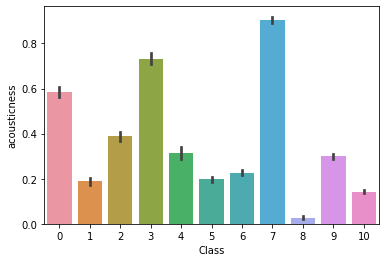

In [116]:
sns.barplot(x = 'Class',y='acousticness',data=data);

It seems that the most acousticn class is number 7: **Instrumental**

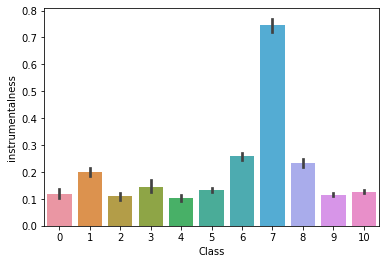

In [117]:
sns.barplot(x = 'Class',y='instrumentalness',data=data);

It seems that the most instrumental class is also number 7: **Instrumental** , which make sense

## Data scaling:

Before scaling the data, we need to address the problem of having negative values in the **loudness** column. 
<br>
The best thing to do is to shift the data by adding all the numbers in **loudness** column with the absolute of the most negative value. Then we can scale the data as usual.

So, let's find out the most negative value (minimum vlaue) in **loudness** column

In [124]:
abs(data.loudness.min())

39.952

In [125]:
data['loudness']=  (data['loudness'] + abs(data.loudness.min()))

Check the minimum value after shifting, it should be 0

In [127]:
abs(data.loudness.min())

0.0

Another thing before scaling, we need to split the data to X and y

In [135]:
X = data.drop('Class',axis='columns')
y = data['Class']

In [136]:
X.shape

(15982, 13)

In [159]:
X.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [137]:
y.shape

(15982,)

Great! then we scale X dataset as usual

In [138]:
# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(X)

## Classifying the data:

In [140]:
#Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=2018)

In [154]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="multi:softmax",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       num_class=11,
                       colsample_bytree=.8
                      )

fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_metric='rmse',
                    verbose=False 
                   )

In [155]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [156]:
prediction = gbm.predict(X_test)

In [157]:
rmse(y_test, prediction)

3.9352357871742405

In [158]:
accuracy_score(y_test, prediction)

0.41851736002502343